#Q1

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
PATH = '/content/gdrive/MyDrive/IR/Assignment-1/Humor,Hist,Media,Food/'

In [ ]:
import os
import nltk
from nltk.corpus import stopwords
import re
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import pandas as pd
import numpy as np
import joblib

In [ ]:
FILES = os.listdir(PATH)

In [ ]:
def preprocess_file(path_to_file):
  f = open(path_to_file,"r",encoding='latin')
  content = f.read()
  content = re.sub(r'[^\w\s]', ' ', content)#removes punctutations
  content = content.lower()#lowercase
  words = word_tokenize(content)#tokeninzing
  words = [word for word in words if not word in set(stopwords.words('english'))]#removing stop words
  lemmatizer = WordNetLemmatizer()
  word_list=[]
  for token in words:
    lemmatized = lemmatizer.lemmatize(token)
    word_list.append(lemmatized)
  # lemmatized_words = [word for word in word_list if not word in set(stopwords.words('english'))]
  return set(word_list)
  # print(stemmed_words)
  # content=' '.join(words)

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
query = input("Enter your Query: ")

Enter your Query: onion pasta white bread


In [ ]:
def preprocess_query(query):
  query = re.sub(r'[^\w\s]', ' ', query) #removes punctutations
  query = query.lower()
  words = word_tokenize(query)
  words = [word for word in words if not word in set(stopwords.words('english'))]
  # stemmer = PorterStemmer()
  lemmatizer = WordNetLemmatizer()
  word_list=[]
  for token in words:
    lemmatized = lemmatizer.lemmatize(token)
    word_list.append(lemmatized)
    # query_words = [word for word in word_list if not word in set(stopwords.words('english'))]
  return set(word_list)

In [ ]:
proc_query = preprocess_query(query)

In [ ]:
def getJaccardCoefficient(proc_query,proc_file):
  return len(proc_query.intersection(proc_file))/len(proc_query.union(proc_file))

In [ ]:
# jaccard_coeffs = {}
# for i in range(len(FILES)):
#   proc_file = preprocess_file(PATH+FILES[i])
#   jaccard_coeffs[i] = getJaccardCoefficient(proc_query,proc_file)

In [ ]:
# joblib.dump(jaccard_coeffs,"/content/gdrive/MyDrive/IR/Assignment-1/jaccard_coeffs.pkl")
jaccard_coeffs = joblib.load("/content/gdrive/MyDrive/IR/Assignment-1/jaccard_coeffs.pkl")

In [ ]:
sorted_JC = list( sorted(jaccard_coeffs.items(), key=lambda x: x[1],reverse=True))
# print(sorted_JC[:5])
top_five=[]
for tups in sorted_JC[:5]:
  top_five.append(tups[0])
# top_five
for f in top_five:
  print(FILES[f])

blkbnsrc.vgn
oranchic.pol
strattma.txt
stagline.txt
pasta001.sal


##TF-IDF

In [ ]:
def preprocess_file_tf(path_to_file):
  f = open(path_to_file,"r",encoding='latin')
  content = f.read()
  content = re.sub(r'[^\w\s]', ' ', content)#removes punctutations
  content = content.lower()#lowercase
  words = word_tokenize(content)#tokeninzing
  words = [word for word in words if not word in set(stopwords.words('english'))]#removing stop words
  lemmatizer = WordNetLemmatizer()
  word_list=[]
  for token in words:
    lemmatized = lemmatizer.lemmatize(token)
    word_list.append(lemmatized)
  # lemmatized_words = [word for word in word_list if not word in set(stopwords.words('english'))]
  return word_list

In [ ]:
# tf = {}
# doc_id=0
# for file in FILES:
#   word_list = preprocess_file_tf(PATH+file)
#   tf_temp={}
#   for word in word_list:
#     if word in tf_temp:
#       tf_temp[word] += 1
#     else:
#       tf_temp[word] = 1
#   tf[doc_id] = tf_temp
#   doc_id +=1

In [ ]:
# joblib.dump(tf,'/content/gdrive/MyDrive/IR/Assignment-1/'+"tf.pkl")
tf = joblib.load("/content/gdrive/MyDrive/IR/Assignment-1/tf.pkl")

In [ ]:
# def add_to_inverted_index(stemmed_word_list,doc_id):
#   for word in stemmed_word_list:
#     if word in inverted_index:
#       inverted_index[word].append(doc_id)
#     else:
#       inverted_index[word] = [doc_id]

In [ ]:
# inverted_index = {}
# doc_id=0
# for file_name in FILES:
#   word_list = preprocess_file(PATH+file_name)
#   add_to_inverted_index(word_list,doc_id)
#   doc_id+=1

In [ ]:
# import joblib
# joblib.dump(inverted_index,'/content/gdrive/MyDrive/IR/Assignment-1/'+"ii.pkl")
inverted_index = joblib.load("/content/gdrive/MyDrive/IR/Assignment-1/ii.pkl")

In [ ]:
df = {}
for k,v in inverted_index.items():
  df[k] = len(v)
# len(df)

In [ ]:
idf={}
def getIDF(df):
  for k in df.keys():
    idf[k] = np.log10(len(FILES)/(df[k]+1))
    # print(k)

getIDF(df)
# idf
# df.keys()

In [ ]:
vocab = list(inverted_index.keys())
vocab_size = len(vocab)
# vocab_size

In [ ]:
def getWordCounts(PATH,doc_name):
  return len(preprocess_file_tf(PATH+doc_name))

In [ ]:
getWordCounts(PATH,FILES[2])

446

In [ ]:
sum(list(tf[2].values()))


446

In [ ]:
####### Raw Count ######
# # tf_idf_matrix =[]
# tf_idf = pd.DataFrame(columns = vocab)
# doc_id=0
# for i in range(len(FILES)):
#   # row=[]
#   temp = {}
#   for j in range(vocab_size):
#     try:
#       val = tf[doc_id][vocab[j]] * idf[vocab[j]]
#     except:
#       val = 0
#     # row.append(val)
#     temp[vocab[j]] = val
#     # print(temp)
#   # print(len(temp))
#   tf_idf = tf_idf.append(temp,ignore_index=True)
#   # tf_idf_matrix.append(row)
#   doc_id += 1
#   # print(temp)
# joblib.dump(tf_idf,"/content/gdrive/MyDrive/IR/Assignment-1/raw_count.pkl")
tf_idf = joblib.load("/content/gdrive/MyDrive/IR/Assignment-1/raw_count.pkl")

In [ ]:
###### Binary #####
# # tf_idf_matrix =[]
# tf_idf_bin = pd.DataFrame(columns = vocab)
# doc_id=0
# for i in range(len(FILES)):
#   # row=[]
#   temp = {}
#   for j in range(vocab_size):
#     try:
#       val = tf[doc_id][vocab[j]] * idf[vocab[j]]
#       val=1 * idf[vocab[j]]
#     except:
#       val = 0
#     # row.append(val)
#     temp[vocab[j]] = val
#     # print(temp)
#   # print(len(temp))
#   tf_idf_bin = tf_idf_bin.append(temp,ignore_index=True)
#   # tf_idf_matrix.append(row)
#   doc_id += 1
#   # print(temp)
# joblib.dump(tf_idf_bin,"/content/gdrive/MyDrive/IR/Assignment-1/binary.pkl")
tf_idf_bin = joblib.load("/content/gdrive/MyDrive/IR/Assignment-1/binary.pkl")

In [ ]:
####### Term Frequency Count ######
# # tf_idf_matrix =[]
# tf_idf_tf = pd.DataFrame(columns = vocab)
# # tf_idf_tf = []
# # doc_id=0
# for doc_id in range(len(FILES)):
#   # row=[]
#   temp = {}
#   for j in range(vocab_size):
#     try:
#     # if vocab[j] in tf[doc_id]:
#       # print(doc_id,j,"inside try")
#       val = (tf[doc_id][vocab[j]] / float(sum(list(tf[2].values())))) * idf[vocab[j]]
#     except:
#     # else:
#       val = 0
#     temp[vocab[j]] = val
#     # row.append(val)
#     # temp.insert(temp,val,1)
#     # temp.append(val)
#   # print(temp)
#   # print(len(temp))
#   # tf_idf_tf = tf_idf_tf.append(temp,ignore_index=True)
#   tf_idf_tf=tf_idf_tf.append(temp,ignore_index=True)
#   # print(doc_id)
#   # tf_idf_matrix.append(row)
#   doc_id += 1
#   # print(temp)
# joblib.dump(tf_idf_tf,"/content/gdrive/MyDrive/IR/Assignment-1/tf_idf_tf.pkl")

['/content/gdrive/MyDrive/IR/Assignment-1/tf_idf_tf.pkl']

In [ ]:
# joblib.dump(tf_idf_tf,"/content/gdrive/MyDrive/IR/Assignment-1/tf_idf_tf.pkl")
tf_idf_tf = joblib.load("/content/gdrive/MyDrive/IR/Assignment-1/tf_idf_tf.pkl")

In [ ]:
tf_idf_tf.head()

,bolt,amid,chapter,countless,sipping,provided,line,curiously,grommet,eye,...,rivaly,pertrubed,lound,anhilation,hereto,whereof,calistogas,unetix,commencing,moffett
0,0.003569,0.004823,0.003001,0.004034,0.004953,0.002569,0.002233,0.004823,0.005498,0.001456,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.003001,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
####### Log normalization Count ######
# # tf_idf_matrix =[]
# tf_idf_ln = pd.DataFrame(columns = vocab)
# # doc_id=0
# for doc_id in range(len(FILES)):
#   # row=[]
#   temp = {}
#   for j in range(vocab_size):
#     try:
#     # if vocab[j] in tf[doc_id]:
#       # print(doc_id,j,"inside try")
#       val = np.log(1+tf[doc_id][vocab[j]]) * idf[vocab[j]]
#     except:
#     # else:
#       val = 0
#     # row.append(val)
#     temp[vocab[j]] = val
#   # print(doc_id)
#   # print(len(temp))
#   tf_idf_ln = tf_idf_ln.append(temp,ignore_index=True)
#   # tf_idf_matrix.append(row)
#   doc_id += 1
#   # print(temp)
# joblib.dump(tf_idf_ln,"/content/gdrive/MyDrive/IR/Assignment-1/ln.pkl")
tf_idf_ln = joblib.load("/content/gdrive/MyDrive/IR/Assignment-1/ln.pkl")

In [ ]:
tf_idf_ln.head()

,bolt,amid,chapter,countless,sipping,provided,line,curiously,grommet,eye,...,rivaly,pertrubed,lound,anhilation,hereto,whereof,calistogas,unetix,commencing,moffett
0,2.540612,3.433285,2.13585,2.871191,3.525842,1.828644,1.259581,3.433285,3.913738,1.036456,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,2.13585,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
####### Double normalization Count ######
# # tf_idf_matrix =[]
# tf_idf_dn = pd.DataFrame(columns = vocab)
# # doc_id=0
# for doc_id in range(len(FILES)):
#   # row=[]
#   temp = {}
#   for j in range(vocab_size):
#     try:
#     # if vocab[j] in tf[doc_id]:
#       # print(doc_id,j,"inside try")
#       val = (0.5+0.5*tf[doc_id][vocab[j]]/max(list(tf[doc_id].values()))) * idf[vocab[j]]
#     except:
#     # else:
#       val = 0
#     # row.append(val)
#     temp[vocab[j]] = val
#   # print(doc_id)
#   # print(len(temp))
#   tf_idf_dn = tf_idf_dn.append(temp,ignore_index=True)
#   # tf_idf_matrix.append(row)
#   doc_id += 1
#   # print(temp)
# joblib.dump(tf_idf_dn,"/content/gdrive/MyDrive/IR/Assignment-1/dn.pkl")
tf_idf_dn = joblib.load("/content/gdrive/MyDrive/IR/Assignment-1/dn.pkl")

In [ ]:
tf_idf_dn.head()

,bolt,amid,chapter,countless,sipping,provided,line,curiously,grommet,eye,...,rivaly,pertrubed,lound,anhilation,hereto,whereof,calistogas,unetix,commencing,moffett
0,2.138108,2.889357,1.797472,2.416314,2.96725,1.538935,0.764347,2.889357,3.293692,0.872252,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,1.582331,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
query = input("Enter your query: ")

Enter your query: onion white sauce pasta pizza


In [ ]:
w=preprocess_query(query)
w

{'onion', 'pasta', 'pizza', 'sauce', 'white'}

In [ ]:
query_vec=[]
for word in vocab:
  if word in w:
    query_vec.append(1)
  else:
    query_vec.append(0)
query_vec = np.array(query_vec)

In [ ]:
query_vec.shape

(65156,)

In [ ]:
#raw count
temp = np.dot(tf_idf,query_vec)
d = {}
for i in range(temp.shape[0]):
  d[FILES[i]] = temp[i]
sorted_rc = list( sorted(d.items(), key=lambda x: x[1],reverse=True))
print(sorted_rc[:5])

[('vegan.rcp', 146.02289320333443), ('appetiz.rcp', 135.07640600105807), ('chili.txt', 104.09256441055992), ('candy.txt', 103.34765514005824), ('penndtch', 82.96882579639367)]


In [ ]:
#binary
temp = np.dot(tf_idf_bin,query_vec)
d = {}
for i in range(temp.shape[0]):
  d[FILES[i]] = temp[i]
sorted_rc = list( sorted(d.items(), key=lambda x: x[1],reverse=True))
print(sorted_rc[:5])

[('appetiz.rcp', 6.006842794972444), ('top10.txt', 4.88203181082334), ('vegan.rcp', 4.751953434562628), ('penndtch', 4.751953434562628), ('foodtips', 4.156732867764972)]


In [ ]:
#Term Frequency
temp = np.dot(tf_idf_tf,query_vec)
d = {}
for i in range(temp.shape[0]):
  d[FILES[i]] = temp[i]
sorted_rc = list( sorted(d.items(), key=lambda x: x[1],reverse=True))
print(sorted_rc[:5])

[('vegan.rcp', 0.32740559014200543), ('appetiz.rcp', 0.3028618968633589), ('chili.txt', 0.23339140002367695), ('candy.txt', 0.2317211998656014), ('penndtch', 0.18602875739101718)]


In [ ]:
#Log Normalisation
temp = np.dot(tf_idf_ln,query_vec)
d = {}
for i in range(temp.shape[0]):
  d[FILES[i]] = temp[i]
sorted_rc = list( sorted(d.items(), key=lambda x: x[1],reverse=True))
print(sorted_rc[:5])

[('appetiz.rcp', 15.54409466809593), ('vegan.rcp', 15.057834671025528), ('penndtch', 11.905706779460882), ('chili.txt', 9.757955128479491), ('jerky.rcp', 7.65008865316905)]


In [ ]:
#Double Normalisation
temp = np.dot(tf_idf_dn,query_vec)
d = {}
for i in range(temp.shape[0]):
  d[FILES[i]] = temp[i]
sorted_rc = list( sorted(d.items(), key=lambda x: x[1],reverse=True))
print(sorted_rc[:5])

[('appetiz.rcp', 3.2255865389353304), ('vegan.rcp', 2.5549263413050083), ('garlpast.vgn', 2.5379583043159624), ('foodtips', 2.522897984333122), ('top10.txt', 2.4713219076981447)]


# Q2

In [ ]:
path = "/content/gdrive/MyDrive/IR/Assignment-2/"

In [ ]:
import os
import numpy as np
import pandas as pd


In [ ]:
data=pd.read_csv(path+'IR-assignment-2-data.txt', sep=' ', header=None,names=["Relevance","Query","Col1","Col2","Col3","Col4","Col5","Col6","Col7","Col8","Col9","Col10","Col11","Col12","Col13","Col14","Col15","Col16","Col17","Col18","Col19","Col20","Col21","Col22","Col23","Col24","Col25","Col26","Col27","Col28","Col29","Col30","Col31","Col32","Col33","Col34","Col35","Col36","Col37","Col38","Col39","Col40","Col41","Col42","Col43","Col44","Col45","Col46","Col47","Col48","Col49","Col50","Col51","Col52","Col53","Col54","Col55","Col56","Col57","Col58","Col59","Col60","Col61","Col62","Col63","Col64","Col65","Col66","Col67","Col68","Col69","Col70","Col71","Col72","Col73","Col74","Col75","Col76","Col77","Col78","Col79","Col80","Col81","Col82","Col83","Col84","Col85","Col86","Col87","Col88","Col89","Col90","Col91","Col92","Col93","Col94","Col95","Col96","Col97","Col98","Col99","Col100","Col101","Col102","Col103","Col104","Col105","Col106","Col107","Col108","Col109","Col110","Col111","Col112","Col113","Col114","Col115","Col116","Col117","Col118","Col119","Col120","Col121","Col122","Col123","Col124","Col125","Col126","Col127","Col128","Col129","Col130","Col131","Col132","Col133","Col134","Col135","Col136","Col137"])

In [ ]:
data.shape

(239093, 139)

In [ ]:
data = data.drop(['Col137'],axis=1)

##part-1

In [ ]:
df = data[data['Query']=='qid:4'] #This is the working dataframe 

In [ ]:
df

,Relevance,Query,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,...,Col127,Col128,Col129,Col130,Col131,Col132,Col133,Col134,Col135,Col136
0,0,qid:4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,...,127:27,128:2,129:9,130:124,131:4678,132:54,133:74,134:0,135:0,136:0
1,0,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,127:61,128:0,129:8,130:122,131:508,132:131,133:136,134:0,135:0,136:0
2,0,qid:4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,...,127:31,128:2,129:8,130:115,131:508,132:51,133:70,134:0,135:0,136:0
3,0,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,127:32,128:82,129:17,130:122,131:508,132:83,133:107,134:0,135:10,136:13.35
4,1,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,127:29,128:11,129:8,130:121,131:508,132:103,133:120,134:0,135:0,136:0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,0,qid:4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,...,127:62,128:35,129:1,130:153,131:4872,132:9,133:55,134:0,135:0,136:0
99,1,qid:4,1:3,2:0,3:3,4:2,5:3,6:1,7:0,8:1,...,127:52,128:367,129:6,130:153,131:2383,132:18,133:99,134:0,135:16,136:11.3166666666667
100,2,qid:4,1:2,2:0,3:2,4:0,5:2,6:0.666667,7:0,8:0.666667,...,127:28,128:0,129:0,130:49182,131:26966,132:15,133:69,134:0,135:193,136:21.9355595468361
101,1,qid:4,1:2,2:0,3:2,4:0,5:2,6:0.666667,7:0,8:0.666667,...,127:23,128:0,129:1,130:42877,131:26562,132:12,133:24,134:0,135:56,136:62.9206042323688


In [ ]:
df.shape

(103, 138)

In [ ]:
df.Relevance.unique() #Different order of relevance

array([0, 1, 3, 2])

##part-2

In [ ]:
result = df.sort_values(by=['Relevance'],ascending=False)

In [ ]:
result

,Relevance,Query,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,...,Col127,Col128,Col129,Col130,Col131,Col132,Col133,Col134,Col135,Col136
7,3,qid:4,1:3,2:0,3:2,4:1,5:3,6:1,7:0,8:0.666667,...,127:32,128:349,129:8,130:123,131:281,132:22,133:6,134:0,135:0,136:0
76,2,qid:4,1:2,2:0,3:1,4:0,5:2,6:0.666667,7:0,8:0.333333,...,127:19,128:0,129:0,130:2417,131:721,132:14,133:113,134:0,135:13,136:47.9
40,2,qid:4,1:3,2:2,3:2,4:0,5:3,6:1,7:0.666667,8:0.666667,...,127:33,128:8,129:3,130:1888,131:9338,132:3,133:11,134:0,135:0,136:0
36,2,qid:4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,...,127:17,128:0,129:2,130:12028,131:11379,132:26,133:24,134:0,135:77,136:23.9595223404047
90,2,qid:4,1:3,2:0,3:3,4:3,5:3,6:1,7:0,8:1,...,127:67,128:27,129:0,130:814,131:13555,132:108,133:113,134:0,135:0,136:0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44,0,qid:4,1:2,2:0,3:0,4:0,5:2,6:0.666667,7:0,8:0,...,127:41,128:8,129:0,130:868,131:9260,132:246,133:88,134:0,135:0,136:0
43,0,qid:4,1:2,2:0,3:0,4:0,5:2,6:0.666667,7:0,8:0,...,127:38,128:4,129:0,130:797,131:9260,132:237,133:80,134:0,135:0,136:0
42,0,qid:4,1:3,2:0,3:3,4:1,5:3,6:1,7:0,8:1,...,127:65,128:83,129:5,130:144,131:262,132:157,133:179,134:0,135:0,136:0
41,0,qid:4,1:3,2:1,3:3,4:2,5:3,6:1,7:0.333333,8:1,...,127:65,128:195,129:8,130:124,131:206,132:103,133:121,134:0,135:0,136:0


In [ ]:
result_unique = result.drop_duplicates()

In [ ]:
result_unique.shape

(103, 138)

In [ ]:
result.shape

(103, 138)

In [ ]:
x = result['Relevance'].value_counts()
print(x)

0    59
1    26
2    17
3     1
Name: Relevance, dtype: int64


In [ ]:
def factorial(n):
     
    # single line to find factorial
    return 1 if (n==1 or n==0) else n * factorial(n - 1);

In [ ]:
total=1
for i in x:
  print(i)
  total = total*(factorial(i))

59
26
17
1


In [ ]:
total

19893497375938370599826047614905329896936840170566570588205180312704857992695193482412686565431050240000000000000000000000

##part-3

###part-3-a

In [ ]:
df

,Relevance,Query,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,...,Col127,Col128,Col129,Col130,Col131,Col132,Col133,Col134,Col135,Col136
0,0,qid:4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,...,127:27,128:2,129:9,130:124,131:4678,132:54,133:74,134:0,135:0,136:0
1,0,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,127:61,128:0,129:8,130:122,131:508,132:131,133:136,134:0,135:0,136:0
2,0,qid:4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,...,127:31,128:2,129:8,130:115,131:508,132:51,133:70,134:0,135:0,136:0
3,0,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,127:32,128:82,129:17,130:122,131:508,132:83,133:107,134:0,135:10,136:13.35
4,1,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,127:29,128:11,129:8,130:121,131:508,132:103,133:120,134:0,135:0,136:0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,0,qid:4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,...,127:62,128:35,129:1,130:153,131:4872,132:9,133:55,134:0,135:0,136:0
99,1,qid:4,1:3,2:0,3:3,4:2,5:3,6:1,7:0,8:1,...,127:52,128:367,129:6,130:153,131:2383,132:18,133:99,134:0,135:16,136:11.3166666666667
100,2,qid:4,1:2,2:0,3:2,4:0,5:2,6:0.666667,7:0,8:0.666667,...,127:28,128:0,129:0,130:49182,131:26966,132:15,133:69,134:0,135:193,136:21.9355595468361
101,1,qid:4,1:2,2:0,3:2,4:0,5:2,6:0.666667,7:0,8:0.666667,...,127:23,128:0,129:1,130:42877,131:26562,132:12,133:24,134:0,135:56,136:62.9206042323688


In [ ]:
df_at_50 = df.head(50)

In [ ]:
df_at_50

,Relevance,Query,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,...,Col127,Col128,Col129,Col130,Col131,Col132,Col133,Col134,Col135,Col136
0,0,qid:4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,...,127:27,128:2,129:9,130:124,131:4678,132:54,133:74,134:0,135:0,136:0
1,0,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,127:61,128:0,129:8,130:122,131:508,132:131,133:136,134:0,135:0,136:0
2,0,qid:4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,...,127:31,128:2,129:8,130:115,131:508,132:51,133:70,134:0,135:0,136:0
3,0,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,127:32,128:82,129:17,130:122,131:508,132:83,133:107,134:0,135:10,136:13.35
4,1,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,127:29,128:11,129:8,130:121,131:508,132:103,133:120,134:0,135:0,136:0
5,0,qid:4,1:3,2:1,3:2,4:1,5:3,6:1,7:0.333333,8:0.666667,...,127:45,128:82,129:7,130:123,131:4262,132:47,133:79,134:0,135:4,136:6.68
6,1,qid:4,1:3,2:0,3:1,4:1,5:3,6:1,7:0,8:0.333333,...,127:46,128:22,129:2,130:256,131:9102,132:28,133:23,134:0,135:0,136:0
7,3,qid:4,1:3,2:0,3:2,4:1,5:3,6:1,7:0,8:0.666667,...,127:32,128:349,129:8,130:123,131:281,132:22,133:6,134:0,135:0,136:0
8,0,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,127:51,128:766,129:0,130:119,131:32560,132:45,133:24,134:0,135:0,136:0
9,0,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,127:33,128:367,129:8,130:266,131:398,132:89,133:114,134:0,135:0,136:0


In [ ]:
df_result_50 =  df_at_50.sort_values(by=['Relevance'],ascending=False) #sorted data


In [ ]:
df_result_50 = df_result_50.reset_index() # resetting index to 0,1,2,3...49


In [ ]:
df_result_50

,index,Relevance,Query,Col1,Col2,Col3,Col4,Col5,Col6,Col7,...,Col127,Col128,Col129,Col130,Col131,Col132,Col133,Col134,Col135,Col136
0,7,3,qid:4,1:3,2:0,3:2,4:1,5:3,6:1,7:0,...,127:32,128:349,129:8,130:123,131:281,132:22,133:6,134:0,135:0,136:0
1,25,2,qid:4,1:3,2:0,3:3,4:1,5:3,6:1,7:0,...,127:52,128:2664,129:0,130:5753,131:11746,132:8,133:68,134:0,135:0,136:0
2,18,2,qid:4,1:3,2:0,3:2,4:1,5:3,6:1,7:0,...,127:60,128:0,129:5,130:790,131:4744,132:18,133:60,134:0,135:0,136:0
3,34,2,qid:4,1:3,2:1,3:3,4:2,5:3,6:1,7:0.333333,...,127:79,128:1901,129:0,130:5555,131:6578,132:6,133:94,134:0,135:0,136:0
4,36,2,qid:4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,...,127:17,128:0,129:2,130:12028,131:11379,132:26,133:24,134:0,135:77,136:23.9595223404047
5,37,2,qid:4,1:2,2:0,3:2,4:0,5:2,6:0.666667,7:0,...,127:23,128:0,129:0,130:16417,131:9338,132:29,133:29,134:6,135:68,136:28.1902038750723
6,22,2,qid:4,1:3,2:1,3:3,4:0,5:3,6:1,7:0.333333,...,127:59,128:189,129:8,130:144,131:4307,132:82,133:108,134:0,135:0,136:0
7,21,2,qid:4,1:3,2:1,3:3,4:2,5:3,6:1,7:0.333333,...,127:67,128:8,129:5,130:144,131:395,132:13,133:56,134:0,135:0,136:0
8,19,2,qid:4,1:3,2:0,3:2,4:1,5:3,6:1,7:0,...,127:49,128:553,129:2,130:876,131:10008,132:42,133:45,134:0,135:0,136:0
9,40,2,qid:4,1:3,2:2,3:2,4:0,5:3,6:1,7:0.666667,...,127:33,128:8,129:3,130:1888,131:9338,132:3,133:11,134:0,135:0,136:0


In [ ]:
x = df_result_50['Relevance'].value_counts()
print(x)

0    30
1    10
2     9
3     1
Name: Relevance, dtype: int64


In [ ]:
df_result_50.shape[0]

50

In [ ]:
# from typing import ForwardRef
def calc_ndgc(df1):
  print(df1.shape)
  dgc = 0
  for index, row in df1.iterrows():
    # print(row['level_0'], row['Relevance'])
    if index == 0:
      dgc = dgc + row['Relevance']
      continue
    dgc = dgc + (row['Relevance']/np.log2(index+1))
  return dgc
    
  # for i in range(df_result_50.shape[0]):
  #   print(df1[i]['Relevance'])
  #   print(i+1)

In [ ]:
df_result_50

,index,Relevance,Query,Col1,Col2,Col3,Col4,Col5,Col6,Col7,...,Col127,Col128,Col129,Col130,Col131,Col132,Col133,Col134,Col135,Col136
0,7,3,qid:4,1:3,2:0,3:2,4:1,5:3,6:1,7:0,...,127:32,128:349,129:8,130:123,131:281,132:22,133:6,134:0,135:0,136:0
1,25,2,qid:4,1:3,2:0,3:3,4:1,5:3,6:1,7:0,...,127:52,128:2664,129:0,130:5753,131:11746,132:8,133:68,134:0,135:0,136:0
2,18,2,qid:4,1:3,2:0,3:2,4:1,5:3,6:1,7:0,...,127:60,128:0,129:5,130:790,131:4744,132:18,133:60,134:0,135:0,136:0
3,34,2,qid:4,1:3,2:1,3:3,4:2,5:3,6:1,7:0.333333,...,127:79,128:1901,129:0,130:5555,131:6578,132:6,133:94,134:0,135:0,136:0
4,36,2,qid:4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,...,127:17,128:0,129:2,130:12028,131:11379,132:26,133:24,134:0,135:77,136:23.9595223404047
5,37,2,qid:4,1:2,2:0,3:2,4:0,5:2,6:0.666667,7:0,...,127:23,128:0,129:0,130:16417,131:9338,132:29,133:29,134:6,135:68,136:28.1902038750723
6,22,2,qid:4,1:3,2:1,3:3,4:0,5:3,6:1,7:0.333333,...,127:59,128:189,129:8,130:144,131:4307,132:82,133:108,134:0,135:0,136:0
7,21,2,qid:4,1:3,2:1,3:3,4:2,5:3,6:1,7:0.333333,...,127:67,128:8,129:5,130:144,131:395,132:13,133:56,134:0,135:0,136:0
8,19,2,qid:4,1:3,2:0,3:2,4:1,5:3,6:1,7:0,...,127:49,128:553,129:2,130:876,131:10008,132:42,133:45,134:0,135:0,136:0
9,40,2,qid:4,1:3,2:2,3:2,4:0,5:3,6:1,7:0.666667,...,127:33,128:8,129:3,130:1888,131:9338,132:3,133:11,134:0,135:0,136:0


In [ ]:
Max_dgc50 = calc_ndgc(df_result_50)

(50, 139)


In [ ]:
Max_dgc50

14.067092644997018

In [ ]:
df_at_50

,Relevance,Query,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,...,Col127,Col128,Col129,Col130,Col131,Col132,Col133,Col134,Col135,Col136
0,0,qid:4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,...,127:27,128:2,129:9,130:124,131:4678,132:54,133:74,134:0,135:0,136:0
1,0,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,127:61,128:0,129:8,130:122,131:508,132:131,133:136,134:0,135:0,136:0
2,0,qid:4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,...,127:31,128:2,129:8,130:115,131:508,132:51,133:70,134:0,135:0,136:0
3,0,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,127:32,128:82,129:17,130:122,131:508,132:83,133:107,134:0,135:10,136:13.35
4,1,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,127:29,128:11,129:8,130:121,131:508,132:103,133:120,134:0,135:0,136:0
5,0,qid:4,1:3,2:1,3:2,4:1,5:3,6:1,7:0.333333,8:0.666667,...,127:45,128:82,129:7,130:123,131:4262,132:47,133:79,134:0,135:4,136:6.68
6,1,qid:4,1:3,2:0,3:1,4:1,5:3,6:1,7:0,8:0.333333,...,127:46,128:22,129:2,130:256,131:9102,132:28,133:23,134:0,135:0,136:0
7,3,qid:4,1:3,2:0,3:2,4:1,5:3,6:1,7:0,8:0.666667,...,127:32,128:349,129:8,130:123,131:281,132:22,133:6,134:0,135:0,136:0
8,0,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,127:51,128:766,129:0,130:119,131:32560,132:45,133:24,134:0,135:0,136:0
9,0,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,127:33,128:367,129:8,130:266,131:398,132:89,133:114,134:0,135:0,136:0


In [ ]:
df_at_50 = df_at_50.reset_index()

In [ ]:
dgc50 = calc_ndgc(df_at_50)

(50, 139)


In [ ]:
dgc50

7.390580969258021

In [ ]:
ndcg50 = dgc50/Max_dgc50
print(ndcg50)

0.5253808413557646


###part-3-b

In [ ]:
df = df.reset_index()

In [ ]:
whole_dataSet_dgc = calc_ndgc(df)

(103, 139)


In [ ]:
df.shape

(103, 139)

In [ ]:
df

,index,Relevance,Query,Col1,Col2,Col3,Col4,Col5,Col6,Col7,...,Col127,Col128,Col129,Col130,Col131,Col132,Col133,Col134,Col135,Col136
0,0,0,qid:4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,...,127:27,128:2,129:9,130:124,131:4678,132:54,133:74,134:0,135:0,136:0
1,1,0,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,...,127:61,128:0,129:8,130:122,131:508,132:131,133:136,134:0,135:0,136:0
2,2,0,qid:4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,...,127:31,128:2,129:8,130:115,131:508,132:51,133:70,134:0,135:0,136:0
3,3,0,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,...,127:32,128:82,129:17,130:122,131:508,132:83,133:107,134:0,135:10,136:13.35
4,4,1,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,...,127:29,128:11,129:8,130:121,131:508,132:103,133:120,134:0,135:0,136:0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,98,0,qid:4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,...,127:62,128:35,129:1,130:153,131:4872,132:9,133:55,134:0,135:0,136:0
99,99,1,qid:4,1:3,2:0,3:3,4:2,5:3,6:1,7:0,...,127:52,128:367,129:6,130:153,131:2383,132:18,133:99,134:0,135:16,136:11.3166666666667
100,100,2,qid:4,1:2,2:0,3:2,4:0,5:2,6:0.666667,7:0,...,127:28,128:0,129:0,130:49182,131:26966,132:15,133:69,134:0,135:193,136:21.9355595468361
101,101,1,qid:4,1:2,2:0,3:2,4:0,5:2,6:0.666667,7:0,...,127:23,128:0,129:1,130:42877,131:26562,132:12,133:24,134:0,135:56,136:62.9206042323688


In [ ]:
result = result.reset_index()

In [ ]:
result

,index,Relevance,Query,Col1,Col2,Col3,Col4,Col5,Col6,Col7,...,Col127,Col128,Col129,Col130,Col131,Col132,Col133,Col134,Col135,Col136
0,7,3,qid:4,1:3,2:0,3:2,4:1,5:3,6:1,7:0,...,127:32,128:349,129:8,130:123,131:281,132:22,133:6,134:0,135:0,136:0
1,76,2,qid:4,1:2,2:0,3:1,4:0,5:2,6:0.666667,7:0,...,127:19,128:0,129:0,130:2417,131:721,132:14,133:113,134:0,135:13,136:47.9
2,40,2,qid:4,1:3,2:2,3:2,4:0,5:3,6:1,7:0.666667,...,127:33,128:8,129:3,130:1888,131:9338,132:3,133:11,134:0,135:0,136:0
3,36,2,qid:4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,...,127:17,128:0,129:2,130:12028,131:11379,132:26,133:24,134:0,135:77,136:23.9595223404047
4,90,2,qid:4,1:3,2:0,3:3,4:3,5:3,6:1,7:0,...,127:67,128:27,129:0,130:814,131:13555,132:108,133:113,134:0,135:0,136:0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,44,0,qid:4,1:2,2:0,3:0,4:0,5:2,6:0.666667,7:0,...,127:41,128:8,129:0,130:868,131:9260,132:246,133:88,134:0,135:0,136:0
99,43,0,qid:4,1:2,2:0,3:0,4:0,5:2,6:0.666667,7:0,...,127:38,128:4,129:0,130:797,131:9260,132:237,133:80,134:0,135:0,136:0
100,42,0,qid:4,1:3,2:0,3:3,4:1,5:3,6:1,7:0,...,127:65,128:83,129:5,130:144,131:262,132:157,133:179,134:0,135:0,136:0
101,41,0,qid:4,1:3,2:1,3:3,4:2,5:3,6:1,7:0.333333,...,127:65,128:195,129:8,130:124,131:206,132:103,133:121,134:0,135:0,136:0


In [ ]:
whole_dataSet_dgc

12.550247459532576

In [ ]:
result.shape

(103, 139)

In [ ]:
whole_dataSet_dgc_Max = calc_ndgc(result)

(103, 139)


In [ ]:
whole_dataSet_dgc_Max

20.989750804831445

In [ ]:
ndcg_Whole_dataset = whole_dataSet_dgc/whole_dataSet_dgc_Max

In [ ]:
ndcg_Whole_dataset

0.5979226516897831

##part-4

In [ ]:
# example of a precision-recall curve for a predictive model
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from matplotlib import pyplot

In [ ]:
dfpr = df

In [ ]:
dfpr

,index,Relevance,Query,Col1,Col2,Col3,Col4,Col5,Col6,Col7,...,Col127,Col128,Col129,Col130,Col131,Col132,Col133,Col134,Col135,Col136
0,0,0,qid:4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,...,127:27,128:2,129:9,130:124,131:4678,132:54,133:74,134:0,135:0,136:0
1,1,0,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,...,127:61,128:0,129:8,130:122,131:508,132:131,133:136,134:0,135:0,136:0
2,2,0,qid:4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,...,127:31,128:2,129:8,130:115,131:508,132:51,133:70,134:0,135:0,136:0
3,3,0,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,...,127:32,128:82,129:17,130:122,131:508,132:83,133:107,134:0,135:10,136:13.35
4,4,1,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,...,127:29,128:11,129:8,130:121,131:508,132:103,133:120,134:0,135:0,136:0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,98,0,qid:4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,...,127:62,128:35,129:1,130:153,131:4872,132:9,133:55,134:0,135:0,136:0
99,99,1,qid:4,1:3,2:0,3:3,4:2,5:3,6:1,7:0,...,127:52,128:367,129:6,130:153,131:2383,132:18,133:99,134:0,135:16,136:11.3166666666667
100,100,2,qid:4,1:2,2:0,3:2,4:0,5:2,6:0.666667,7:0,...,127:28,128:0,129:0,130:49182,131:26966,132:15,133:69,134:0,135:193,136:21.9355595468361
101,101,1,qid:4,1:2,2:0,3:2,4:0,5:2,6:0.666667,7:0,...,127:23,128:0,129:1,130:42877,131:26562,132:12,133:24,134:0,135:56,136:62.9206042323688


In [ ]:
dff = dfpr["Col75"].str.replace("75:","")

In [ ]:
dff

0        90.53171
1      538.388954
2       88.171761
3      144.564444
4      142.589323
          ...    
98      70.460443
99      270.13233
100    296.023694
101    528.520116
102     84.625987
Name: Col75, Length: 103, dtype: object

In [ ]:
dfpr['Col75'] = dff


In [ ]:
dfpr[['Col75']] = dfpr[['Col75']].apply(pd.to_numeric)

In [ ]:
dfpr_sorted = dfpr.sort_values(by=['Col75'],ascending=False) #sorted data

In [ ]:
dfpr_sorted[['Relevance','Col75']]

,Relevance,Col75
8,0,972.826451
67,0,612.893205
56,0,571.500533
1,0,538.388954
101,1,528.520116
...,...,...
94,0,15.773388
16,0,14.972391
86,0,14.972391
49,0,3.539923


In [ ]:
dfpr_sorted

,index,Relevance,Query,Col1,Col2,Col3,Col4,Col5,Col6,Col7,...,Col127,Col128,Col129,Col130,Col131,Col132,Col133,Col134,Col135,Col136
8,8,0,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,...,127:51,128:766,129:0,130:119,131:32560,132:45,133:24,134:0,135:0,136:0
67,67,0,qid:4,1:3,2:0,3:3,4:2,5:3,6:1,7:0,...,127:61,128:0,129:9,130:120,131:392,132:162,133:169,134:0,135:0,136:0
56,56,0,qid:4,1:3,2:1,3:3,4:1,5:3,6:1,7:0.333333,...,127:48,128:189,129:8,130:549,131:2650,132:91,133:114,134:0,135:0,136:0
1,1,0,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,...,127:61,128:0,129:8,130:122,131:508,132:131,133:136,134:0,135:0,136:0
101,101,1,qid:4,1:2,2:0,3:2,4:0,5:2,6:0.666667,7:0,...,127:23,128:0,129:1,130:42877,131:26562,132:12,133:24,134:0,135:56,136:62.9206042323688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,94,0,qid:4,1:2,2:0,3:0,4:0,5:2,6:0.666667,7:0,...,127:19,128:0,129:2,130:59949,131:22708,132:5,133:6,134:0,135:391,136:28.2671136253899
16,16,0,qid:4,1:3,2:0,3:0,4:0,5:3,6:1,7:0,...,127:48,128:2,129:2,130:144,131:1917,132:19,133:119,134:0,135:0,136:0
86,86,0,qid:4,1:3,2:0,3:0,4:0,5:3,6:1,7:0,...,127:34,128:43,129:2,130:3262,131:1859,132:20,133:165,134:0,135:0,136:0
49,49,0,qid:4,1:1,2:0,3:1,4:0,5:1,6:0.333333,7:0,...,127:24,128:11,129:0,130:9040,131:8756,132:51,133:17,134:0,135:10,136:20.1333333333333


In [ ]:
dfpr_ranked = dfpr_sorted[['index','Relevance','Col75']]

In [ ]:
dfpr_ranked

,index,Relevance,Col75
8,8,0,972.826451
67,67,0,612.893205
56,56,0,571.500533
1,1,0,538.388954
101,101,1,528.520116
...,...,...,...
94,94,0,15.773388
16,16,0,14.972391
86,86,0,14.972391
49,49,0,3.539923


In [ ]:
 for index, row in dfpr_ranked.iterrows():
    if(row['Relevance']!=0):
      dfpr_ranked.at[index,'Relevance'] = 1
        # row['Relevance']=1

In [ ]:
dfpr_ranked

,index,Relevance,Col75
8,8,0,972.826451
67,67,0,612.893205
56,56,0,571.500533
1,1,0,538.388954
101,101,1,528.520116
...,...,...,...
94,94,0,15.773388
16,16,0,14.972391
86,86,0,14.972391
49,49,0,3.539923


In [ ]:
dfpr_ranked.Relevance.unique()

array([0, 1])

In [ ]:
dfpr_ranked

,index,Relevance,Col75
8,8,0,972.826451
67,67,0,612.893205
56,56,0,571.500533
1,1,0,538.388954
101,101,1,528.520116
...,...,...,...
94,94,0,15.773388
16,16,0,14.972391
86,86,0,14.972391
49,49,0,3.539923


In [ ]:
prec_list=[]
rec_list=[]


In [ ]:
totalrel = dfpr_ranked.Relevance.value_counts()[1]
print(totalrel)

44


In [ ]:
counter=0
relsofar = 0

for index, row in dfpr_ranked.iterrows():
  # print(index)
  counter+=1
  if(row['Relevance']==1):
    relsofar+=1
  prec_list.append(relsofar/counter)
  rec_list.append(relsofar/totalrel)




In [ ]:
prec_list

[0.0,
 0.0,
 0.0,
 0.0,
 0.2,
 0.16666666666666666,
 0.2857142857142857,
 0.375,
 0.3333333333333333,
 0.4,
 0.36363636363636365,
 0.4166666666666667,
 0.46153846153846156,
 0.5,
 0.5333333333333333,
 0.5625,
 0.5294117647058824,
 0.5555555555555556,
 0.5263157894736842,
 0.55,
 0.5238095238095238,
 0.5,
 0.5217391304347826,
 0.5416666666666666,
 0.56,
 0.5769230769230769,
 0.5555555555555556,
 0.5357142857142857,
 0.5172413793103449,
 0.5,
 0.4838709677419355,
 0.5,
 0.48484848484848486,
 0.5,
 0.4857142857142857,
 0.4722222222222222,
 0.4864864864864865,
 0.5,
 0.48717948717948717,
 0.5,
 0.5121951219512195,
 0.5238095238095238,
 0.5116279069767442,
 0.5,
 0.4888888888888889,
 0.4782608695652174,
 0.48936170212765956,
 0.4791666666666667,
 0.46938775510204084,
 0.48,
 0.49019607843137253,
 0.5,
 0.49056603773584906,
 0.5,
 0.509090909090909,
 0.5,
 0.5087719298245614,
 0.5172413793103449,
 0.5084745762711864,
 0.5166666666666667,
 0.5081967213114754,
 0.5,
 0.5079365079365079,
 0.5,


In [ ]:
rec_list

[0.0,
 0.0,
 0.0,
 0.0,
 0.022727272727272728,
 0.022727272727272728,
 0.045454545454545456,
 0.06818181818181818,
 0.06818181818181818,
 0.09090909090909091,
 0.09090909090909091,
 0.11363636363636363,
 0.13636363636363635,
 0.1590909090909091,
 0.18181818181818182,
 0.20454545454545456,
 0.20454545454545456,
 0.22727272727272727,
 0.22727272727272727,
 0.25,
 0.25,
 0.25,
 0.2727272727272727,
 0.29545454545454547,
 0.3181818181818182,
 0.3409090909090909,
 0.3409090909090909,
 0.3409090909090909,
 0.3409090909090909,
 0.3409090909090909,
 0.3409090909090909,
 0.36363636363636365,
 0.36363636363636365,
 0.38636363636363635,
 0.38636363636363635,
 0.38636363636363635,
 0.4090909090909091,
 0.4318181818181818,
 0.4318181818181818,
 0.45454545454545453,
 0.4772727272727273,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5227272727272727,
 0.5227272727272727,
 0.5227272727272727,
 0.5454545454545454,
 0.5681818181818182,
 0.5909090909090909,
 0.5909090909090909,
 0.6136363636363636,
 0.6363636363636364

In [ ]:
import matplotlib.pyplot as plt

No handles with labels found to put in legend.


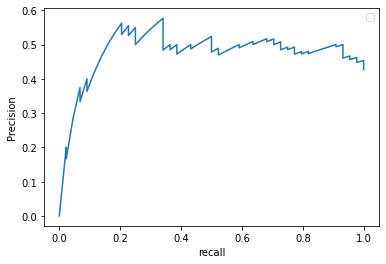

In [ ]:
plt.plot(rec_list,prec_list)
plt.xlabel('recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

#Q-3

In [ ]:

path1 = "/content/drive/MyDrive/IR/Assignment-2/Q3/comp.graphics/"
path2 = "/content/drive/MyDrive/IR/Assignment-2/Q3/rec.sport.hockey/" 
path3 = "/content/drive/MyDrive/IR/Assignment-2/Q3/sci.med/"
path4 = "/content/drive/MyDrive/IR/Assignment-2/Q3/sci.space/"
path5 = "/content/drive/MyDrive/IR/Assignment-2/Q3/talk.politics.misc/"

In [ ]:
listF1 = os.listdir(path1)
listF2 = os.listdir(path2)
listF3 = os.listdir(path3)
listF4 = os.listdir(path4)
listF5 = os.listdir(path5)

In [ ]:
print(len(listF1))
print(len(listF2))
print(len(listF3))
print(len(listF4))
print(len(listF5))

In [ ]:
ratio = 0.2

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
df1 = pd.DataFrame(listF1,columns=['Doc'])
df1['Class'] = 0
# df1
df2 = pd.DataFrame(listF2,columns=['Doc'])
df2['Class'] = 1

df3 = pd.DataFrame(listF3,columns=['Doc'])
df3['Class'] = 2

df4 = pd.DataFrame(listF4,columns=['Doc'])
df4['Class'] = 3

df5 = pd.DataFrame(listF5,columns=['Doc'])
df5['Class'] = 4


In [ ]:
df5

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(df1,df1['Class'], test_size=ratio, random_state=42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(df2,df2['Class'], test_size=ratio, random_state=42)
X_train3, X_test3, y_train3, y_test3 = train_test_split(df3,df3['Class'], test_size=ratio, random_state=42)
X_train4, X_test4, y_train4, y_test4 = train_test_split(df4,df4['Class'], test_size=ratio, random_state=42)
X_train5, X_test5, y_train5, y_test5 = train_test_split(df5,df5['Class'], test_size=ratio, random_state=42)

In [ ]:
#perforiming the preprocessing of the files
def preprocess_file(path_to_file):
  f = open(path_to_file,"r",encoding ='latin1')
  content = f.read()
  content = content.lower()#lower case converted 
  content = re.sub(r'[^\w\s]', ' ', content) #punctuation and space
  words = word_tokenize(content) #word tokenization done
  words = [word for word in words if not word in set(stopwords.words('english'))] #removing stopwords
  lemmatizer = WordNetLemmatizer() 
  word_list_2=[]
  for token in words:
    lemmatized = lemmatizer.lemmatize(token)
    word_list_2.append(lemmatized)
  return word_list_2

In [ ]:
files1 = os.listdir(path1)
files2 = os.listdir(path2)
files3 = os.listdir(path3)
files4 = os.listdir(path4)
files5 = os.listdir(path5)

In [ ]:
word_list_1 = []
for file_name in df1['Doc']:
  print(file_name)
  #preprocessing each file
  word_list_1.extend(preprocess_file(path1+file_name))

word_list_2 = []
for file_name in df2['Doc']:
  print(file_name)
  #preprocessing each file
  word_list_2.extend(preprocess_file(path2+file_name))

word_list_3 = []
for file_name in df3['Doc']:
  print(file_name)
  #preprocessing each file
  word_list_3.extend(preprocess_file(path3+file_name))

word_list_4 = []
for file_name in df4['Doc']:
  print(file_name)
  #preprocessing each file
  word_list_4.extend(preprocess_file(path4+file_name))

word_list_5 = []
for file_name in df5['Doc']:
  print(file_name)
  #preprocessing each file
  word_list_5.extend(preprocess_file(path5+file_name))

In [ ]:
# word_list_1 = []
# for file_name in files1:
#   print(file_name)
#   #preprocessing each file
#   word_list_1.extend(preprocess_file(path1+file_name))

# word_list_2 = []
# for file_name in files2:
#   print(file_name)
#   #preprocessing each file
#   word_list_2.extend(preprocess_file(path2+file_name))

# word_list_3 = []
# for file_name in files3:
#   print(file_name)
#   #preprocessing each file
#   word_list_3.extend(preprocess_file(path3+file_name))

# word_list_4 = []
# for file_name in files4:
#   print(file_name)
#   #preprocessing each file
#   word_list_4.extend(preprocess_file(path4+file_name))

# word_list_5 = []
# for file_name in files5:
#   print(file_name)
#   #preprocessing each file
#   word_list_5.extend(preprocess_file(path5+file_name))

In [ ]:
# import pickle

# with open('wordlist1', 'wb') as fp:
#     pickle.dump(word_list_1, fp)

In [ ]:
import pickle


In [ ]:
with open('/content/drive/MyDrive/IR/Assignment-2/Q3/wordlists/wordlist1', 'wb') as fp:
    pickle.dump(word_list_1, fp)

with open('/content/drive/MyDrive/IR/Assignment-2/Q3/wordlists/wordlist2', 'wb') as fp:
    pickle.dump(word_list_2, fp)

with open('/content/drive/MyDrive/IR/Assignment-2/Q3/wordlists/wordlist3', 'wb') as fp:
    pickle.dump(word_list_3, fp)

with open('/content/drive/MyDrive/IR/Assignment-2/Q3/wordlists/wordlist4', 'wb') as fp:
    pickle.dump(word_list_4, fp)

with open('/content/drive/MyDrive/IR/Assignment-2/Q3/wordlists/wordlist5', 'wb') as fp:
    pickle.dump(word_list_5, fp)

In [ ]:
# To read it back:
import pickle
with open ('/content/drive/MyDrive/IR/Assignment-2/Q3/wordlists/wordlist1', 'rb') as fp:
    word_list_1 = pickle.load(fp)
with open ('/content/drive/MyDrive/IR/Assignment-2/Q3/wordlists/wordlist2', 'rb') as fp:
    word_list_2 = pickle.load(fp)
with open ('/content/drive/MyDrive/IR/Assignment-2/Q3/wordlists/wordlist3', 'rb') as fp:
    word_list_3 = pickle.load(fp)
with open ('/content/drive/MyDrive/IR/Assignment-2/Q3/wordlists/wordlist4', 'rb') as fp:
    word_list_4 = pickle.load(fp)
with open ('/content/drive/MyDrive/IR/Assignment-2/Q3/wordlists/wordlist5', 'rb') as fp:
    word_list_5 = pickle.load(fp)


In [ ]:
len(word_list_2)

In [ ]:
unique_word_set1 = set(word_list_1)
unique_word_set2 = set(word_list_2)
unique_word_set3 = set(word_list_3)
unique_word_set4 = set(word_list_4)
unique_word_set5 = set(word_list_5)



In [ ]:
unique_word_set1

In [ ]:
from collections import Counter
dic1 = Counter(word_list_1)
dic2 = Counter(word_list_2)
dic3 = Counter(word_list_3)
dic4 = Counter(word_list_4)
dic5 = Counter(word_list_5)

In [ ]:
unique_word_set_all_merged = unique_word_set1.union(unique_word_set2)
unique_word_set_all_merged = unique_word_set_all_merged.union(unique_word_set3)
unique_word_set_all_merged = unique_word_set_all_merged.union(unique_word_set4)
unique_word_set_all_merged = unique_word_set_all_merged.union(unique_word_set5)


In [ ]:
len(unique_word_set2)

In [ ]:
len(unique_word_set_all_merged)

In [ ]:
# Class Frequency 
# By Definition the count of classes the word is present in.
cf = {}
for word in unique_word_set_all_merged:
  count = 0
  if word in dic1.keys():
    count+=1
  if word in dic2.keys():
    count+=1
  if word in dic3.keys():
    count+=1
  if word in dic4.keys():
    count+=1
  if word in dic5.keys():
    count+=1
  cf[word] = count


In [ ]:
cf

In [ ]:
# Inverse Class Frequency
icf = {}
for word in unique_word_set_all_merged:
  icf[word] = np.log10(5/cf[word])

In [ ]:
len(unique_word_set_all_merged)

In [ ]:
icf

In [ ]:
tcidfmatrix = pd.DataFrame(columns=['Doc','Class'])
tcidfmatrix.shape

In [ ]:

print(X_train1.shape)
print(X_train2.shape)
print(X_train3.shape)
print(X_train4.shape)
print(.shape)

In [ ]:
numofrow = X_train1.shape[0] * 5
print(numofrow)
numofcol = len(unique_word_set_all_merged)+2
print(numofcol)

In [ ]:
arr = np.zeros((numofrow,numofcol))

In [ ]:
arr

In [ ]:
arr.shape[0] 

In [ ]:
i=0
for ind,row in X_train1.iterrows():
  arr[i][0] = row['Doc']
  arr[i][1] = row['Class']
  i+=1
for ind,row in X_train2.iterrows():
  arr[i][0] = row['Doc']
  arr[i][1] = row['Class']
  i+=1
for ind,row in X_train3.iterrows():
  arr[i][0] = row['Doc']
  arr[i][1] = row['Class']
  i+=1
for ind,row in X_train4.iterrows():
  arr[i][0] = row['Doc']
  arr[i][1] = row['Class']
  i+=1
for ind,row in X_train5.iterrows():
  arr[i][0] = row['Doc']
  arr[i][1] = row['Class']
  i+=1

In [ ]:
len(unique_word_set_all_merged)

In [ ]:
wordNameIndexMap = {}
index = 2
for word in unique_word_set_all_merged:
  wordNameIndexMap[index]=word
  index+=1



In [ ]:
print(numofrow)
print(numofcol)

In [ ]:
# wordNameIndexMap
for i in range(numofrow):
  print(i)
  for j in range(2,numofcol):
    word = wordNameIndexMap[j]#picked up word from dictionary 
    classId = arr[i][1]
    #find tc and icf of it depending upon its class
    val = 0.0
    if classId == 0:
      try:
        val = dic1[word] * icf[word]
      except:
        val=0.0
    elif classId == 1:
      try:
        val = dic2[word] * icf[word]
      except:
        val=0.0
    elif classId == 2:
      try:
        val = dic3[word] * icf[word]
      except:
        val=0.0
    elif classId == 3:
      try:
        val = dic4[word] * icf[word]
      except:
        val=0.0
    elif classId == 4:
      try:
        val = dic5[word] * icf[word]
      except:
        val=0.0
    arr[i][j]=val


In [ ]:
# for index,row in tcidfmatrix.iterrows():
#   docid = row['Doc']
#   classId = row['Class']
#   temp = {}
#   for word in unique_word_set_all_merged:
#     val=0.0
#     if classId == 0:
#       try:
#         val = df1[word] * icf[word]
#       except:
#         val=0.0
#     elif classId == 1:
#       try:
#         val = df2[word] * icf[word]
#       except:
#         val=0.0
#     elif classId == 2:
#       try:
#         val = df3[word] * icf[word]
#       except:
#         val=0.0
#     elif classId == 3:
#       try:
#         val = df4[word] * icf[word]
#       except:
#         val=0.0
#     elif classId == 4:
#       try:
#         val = df5[word] * icf[word]
#       except:
#         val=0.0
#     row[word]=val
  

# # for docid in tcidfmatrix['Doc']:
# #   for word in unique_word_set_all_merged:
# #     temp = {}
# #     try:
# #       if tcidfmatrix['Class']==0:


In [ ]:
dfarr = pd.DataFrame(arr)

In [ ]:
dfarr

In [ ]:
dfarr.shape

In [ ]:
colmList = ['Doc','Class']

In [ ]:
colmList.extend(unique_word_set_all_merged)

In [ ]:
len(colmList)

In [ ]:
dfarr.columns = colmList

In [ ]:
dfarr

,Doc,Class,lincoln,smacking,dueled,computerized,majestic,111368,oscilator,acosta,...,pl7,hopkins,regress,earle,42970,billaryklintonkligue,005556,ledde,ipri,accolade
0,37938.0,0.0,0.0,0.00000,0.0,0.19382,0.00000,0.00000,0.0,1.39794,...,0.00000,0.0,0.0,0.00000,0.00000,0.00000,0.0,0.0,0.0,0.0
1,38655.0,0.0,0.0,0.00000,0.0,0.19382,0.00000,0.00000,0.0,1.39794,...,0.00000,0.0,0.0,0.00000,0.00000,0.00000,0.0,0.0,0.0,0.0
2,38900.0,0.0,0.0,0.00000,0.0,0.19382,0.00000,0.00000,0.0,1.39794,...,0.00000,0.0,0.0,0.00000,0.00000,0.00000,0.0,0.0,0.0,0.0
3,38642.0,0.0,0.0,0.00000,0.0,0.19382,0.00000,0.00000,0.0,1.39794,...,0.00000,0.0,0.0,0.00000,0.00000,0.00000,0.0,0.0,0.0,0.0
4,38977.0,0.0,0.0,0.00000,0.0,0.19382,0.00000,0.00000,0.0,1.39794,...,0.00000,0.0,0.0,0.00000,0.00000,0.00000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,176877.0,4.0,0.0,0.69897,0.0,0.19382,0.39794,0.69897,0.0,0.00000,...,0.69897,0.0,0.0,0.69897,0.69897,0.69897,0.0,0.0,0.0,0.0
3996,178698.0,4.0,0.0,0.69897,0.0,0.19382,0.39794,0.69897,0.0,0.00000,...,0.69897,0.0,0.0,0.69897,0.69897,0.69897,0.0,0.0,0.0,0.0
3997,178929.0,4.0,0.0,0.69897,0.0,0.19382,0.39794,0.69897,0.0,0.00000,...,0.69897,0.0,0.0,0.69897,0.69897,0.69897,0.0,0.0,0.0,0.0
3998,178837.0,4.0,0.0,0.69897,0.0,0.19382,0.39794,0.69897,0.0,0.00000,...,0.69897,0.0,0.0,0.69897,0.69897,0.69897,0.0,0.0,0.0,0.0


In [ ]:
dfarr.to_csv(r'/content/drive/MyDrive/IR/Assignment-2/Q3/InitialTCICF.csv', index = False)

In [ ]:
# dfarr = pd.read_csv ('/content/drive/MyDrive/IR/Assignment-2/Q3/InitialTCICF.csv')
# print(dfarr)

In [ ]:
dfarr

,Doc,Class,lincoln,smacking,dueled,computerized,majestic,111368,oscilator,acosta,...,pl7,hopkins,regress,earle,42970,billaryklintonkligue,005556,ledde,ipri,accolade
0,37938.0,0.0,0.0,0.00000,0.0,0.19382,0.00000,0.00000,0.0,1.39794,...,0.00000,0.0,0.0,0.00000,0.00000,0.00000,0.0,0.0,0.0,0.0
1,38655.0,0.0,0.0,0.00000,0.0,0.19382,0.00000,0.00000,0.0,1.39794,...,0.00000,0.0,0.0,0.00000,0.00000,0.00000,0.0,0.0,0.0,0.0
2,38900.0,0.0,0.0,0.00000,0.0,0.19382,0.00000,0.00000,0.0,1.39794,...,0.00000,0.0,0.0,0.00000,0.00000,0.00000,0.0,0.0,0.0,0.0
3,38642.0,0.0,0.0,0.00000,0.0,0.19382,0.00000,0.00000,0.0,1.39794,...,0.00000,0.0,0.0,0.00000,0.00000,0.00000,0.0,0.0,0.0,0.0
4,38977.0,0.0,0.0,0.00000,0.0,0.19382,0.00000,0.00000,0.0,1.39794,...,0.00000,0.0,0.0,0.00000,0.00000,0.00000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,176877.0,4.0,0.0,0.69897,0.0,0.19382,0.39794,0.69897,0.0,0.00000,...,0.69897,0.0,0.0,0.69897,0.69897,0.69897,0.0,0.0,0.0,0.0
3996,178698.0,4.0,0.0,0.69897,0.0,0.19382,0.39794,0.69897,0.0,0.00000,...,0.69897,0.0,0.0,0.69897,0.69897,0.69897,0.0,0.0,0.0,0.0
3997,178929.0,4.0,0.0,0.69897,0.0,0.19382,0.39794,0.69897,0.0,0.00000,...,0.69897,0.0,0.0,0.69897,0.69897,0.69897,0.0,0.0,0.0,0.0
3998,178837.0,4.0,0.0,0.69897,0.0,0.19382,0.39794,0.69897,0.0,0.00000,...,0.69897,0.0,0.0,0.69897,0.69897,0.69897,0.0,0.0,0.0,0.0


In [ ]:
dfcls0 = dfarr[dfarr['Class']==0]
print(dfcls0)
dfcls0 = dfcls0.drop(columns = ['Doc','Class'],axis=1)
print(dfcls0)
sum_row0 = dfcls0.sum(axis = 0, skipna = True)
cls0sum = pd.DataFrame(sum_row0)
print(cls0sum)
cls0sum= cls0sum.sort_values(0,ascending=False)
print(cls0sum)



# Class1
dfcls1 = dfarr[dfarr['Class']==1]
print(dfcls1)
dfcls1 = dfcls1.drop(columns = ['Doc','Class'],axis=1)
print(dfcls1)
sum_row1 = dfcls1.sum(axis = 0, skipna = True)
cls1sum = pd.DataFrame(sum_row1)
print(cls1sum)
cls1sum= cls1sum.sort_values(0,ascending=False)
print(cls1sum)

#Class 2
dfcls2 = dfarr[dfarr['Class']==2]
print(dfcls2)
dfcls2 = dfcls2.drop(columns = ['Doc','Class'],axis=1)
print(dfcls2)
sum_row2 = dfcls2.sum(axis = 0, skipna = True)
cls2sum = pd.DataFrame(sum_row2)
print(cls2sum)
cls2sum= cls2sum.sort_values(0,ascending=False)
print(cls2sum)


# Class3
dfcls3 = dfarr[dfarr['Class']==3]
print(dfcls3)
dfcls3 = dfcls3.drop(columns = ['Doc','Class'],axis=1)
print(dfcls3)
sum_row3 = dfcls3.sum(axis = 0, skipna = True)
cls3sum = pd.DataFrame(sum_row3)
print(cls3sum)
cls3sum= cls3sum.sort_values(0,ascending=False)
print(cls3sum)

# Class4
dfcls4 = dfarr[dfarr['Class']==4]
print(dfcls4)
dfcls4 = dfcls4.drop(columns = ['Doc','Class'],axis=1)
print(dfcls4)
sum_row4 = dfcls4.sum(axis = 0, skipna = True)
cls4sum = pd.DataFrame(sum_row4)
print(cls4sum)
cls4sum= cls4sum.sort_values(0,ascending=False)
print(cls4sum)


         Doc  Class  lincoln  smacking  dueled  computerized  majestic  \
0    37938.0    0.0      0.0       0.0     0.0       0.19382       0.0   
1    38655.0    0.0      0.0       0.0     0.0       0.19382       0.0   
2    38900.0    0.0      0.0       0.0     0.0       0.19382       0.0   
3    38642.0    0.0      0.0       0.0     0.0       0.19382       0.0   
4    38977.0    0.0      0.0       0.0     0.0       0.19382       0.0   
..       ...    ...      ...       ...     ...           ...       ...   
795  38573.0    0.0      0.0       0.0     0.0       0.19382       0.0   
796  38433.0    0.0      0.0       0.0     0.0       0.19382       0.0   
797  39002.0    0.0      0.0       0.0     0.0       0.19382       0.0   
798  38514.0    0.0      0.0       0.0     0.0       0.19382       0.0   
799  38570.0    0.0      0.0       0.0     0.0       0.19382       0.0   

     111368  oscilator   acosta  ...  pl7  hopkins  regress  earle  42970  \
0       0.0        0.0  1.39794  .

In [ ]:
# k = input('enter k :')
k=5
topkfeatures = ['Doc','Class']
t = 1
for ind,row in cls0sum.iterrows():
  if t > k :
    break
  print(ind)
  topkfeatures.append(ind)
  t+=1

t = 1
for ind,row in cls1sum.iterrows():
  if t > k :
    break
  print(ind)
  topkfeatures.append(ind)
  t+=1

t = 1
for ind,row in cls2sum.iterrows():
  if t > k :
    break
  print(ind)
  topkfeatures.append(ind)
  t+=1

t = 1
for ind,row in cls3sum.iterrows():
  if t > k :
    break
  print(ind)
  topkfeatures.append(ind)
  t+=1

t = 1
for ind,row in cls4sum.iterrows():
  if t > k :
    break
  print(ind)
  topkfeatures.append(ind)
  t+=1

jpeg
comp
image
polygon
gif
hockey
nhl
det
playoff
bruin
sci
candida
dyer
geb
infection
sci
shuttle
spacecraft
nsmca
sky
optilink
cramer
stephanopoulos
desy
abortion


In [ ]:
topkfeatures

['Doc',
 'Class',
 'jpeg',
 'comp',
 'image',
 'polygon',
 'gif',
 'hockey',
 'nhl',
 'det',
 'playoff',
 'bruin',
 'sci',
 'candida',
 'dyer',
 'geb',
 'infection',
 'sci',
 'shuttle',
 'spacecraft',
 'nsmca',
 'sky',
 'optilink',
 'cramer',
 'stephanopoulos',
 'desy',
 'abortion']

In [ ]:
topkfeaturesfinal = []
for i in topkfeatures:
  if i in topkfeaturesfinal:
    continue
  else:
    topkfeaturesfinal.append(i)

In [ ]:
# topkfeatures = list(set(topkfeatures))
topkfeaturesfinal

['Doc',
 'Class',
 'jpeg',
 'comp',
 'image',
 'polygon',
 'gif',
 'hockey',
 'nhl',
 'det',
 'playoff',
 'bruin',
 'sci',
 'candida',
 'dyer',
 'geb',
 'infection',
 'shuttle',
 'spacecraft',
 'nsmca',
 'sky',
 'optilink',
 'cramer',
 'stephanopoulos',
 'desy',
 'abortion']

In [ ]:
topkfeaturesfinal

['Doc',
 'Class',
 'jpeg',
 'comp',
 'image',
 'polygon',
 'gif',
 'hockey',
 'nhl',
 'det',
 'playoff',
 'bruin',
 'sci',
 'candida',
 'dyer',
 'geb',
 'infection',
 'shuttle',
 'spacecraft',
 'nsmca',
 'sky',
 'optilink',
 'cramer',
 'stephanopoulos',
 'desy',
 'abortion']

In [ ]:
dffinal = dfarr[(topkfeaturesfinal)]

In [ ]:
dffinal

,Doc,Class,jpeg,comp,image,polygon,gif,hockey,nhl,det,...,infection,shuttle,spacecraft,nsmca,sky,optilink,cramer,stephanopoulos,desy,abortion
0,37938.0,0.0,331.086087,229.386001,190.234356,164.956921,103.603366,0.00000,0.0,0.0,...,0.0,3.54958,0.39794,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
1,38655.0,0.0,331.086087,229.386001,190.234356,164.956921,103.603366,0.00000,0.0,0.0,...,0.0,3.54958,0.39794,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
2,38900.0,0.0,331.086087,229.386001,190.234356,164.956921,103.603366,0.00000,0.0,0.0,...,0.0,3.54958,0.39794,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
3,38642.0,0.0,331.086087,229.386001,190.234356,164.956921,103.603366,0.00000,0.0,0.0,...,0.0,3.54958,0.39794,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
4,38977.0,0.0,331.086087,229.386001,190.234356,164.956921,103.603366,0.00000,0.0,0.0,...,0.0,3.54958,0.39794,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,176877.0,4.0,0.000000,0.387640,1.162920,0.000000,0.000000,1.19382,0.0,0.0,...,0.0,0.00000,0.00000,0.0,2.38764,476.697543,378.142772,317.332382,199.206451,185.440044
3996,178698.0,4.0,0.000000,0.387640,1.162920,0.000000,0.000000,1.19382,0.0,0.0,...,0.0,0.00000,0.00000,0.0,2.38764,476.697543,378.142772,317.332382,199.206451,185.440044
3997,178929.0,4.0,0.000000,0.387640,1.162920,0.000000,0.000000,1.19382,0.0,0.0,...,0.0,0.00000,0.00000,0.0,2.38764,476.697543,378.142772,317.332382,199.206451,185.440044
3998,178837.0,4.0,0.000000,0.387640,1.162920,0.000000,0.000000,1.19382,0.0,0.0,...,0.0,0.00000,0.00000,0.0,2.38764,476.697543,378.142772,317.332382,199.206451,185.440044


In [ ]:
x_trainfinal = dffinal.drop(['Class','Doc'],axis = 1)

In [ ]:
x_trainfinal

,jpeg,comp,image,polygon,gif,hockey,nhl,det,playoff,bruin,...,infection,shuttle,spacecraft,nsmca,sky,optilink,cramer,stephanopoulos,desy,abortion
0,331.086087,229.386001,190.234356,164.956921,103.603366,0.00000,0.0,0.0,0.00000,0.0,...,0.0,3.54958,0.39794,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
1,331.086087,229.386001,190.234356,164.956921,103.603366,0.00000,0.0,0.0,0.00000,0.0,...,0.0,3.54958,0.39794,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
2,331.086087,229.386001,190.234356,164.956921,103.603366,0.00000,0.0,0.0,0.00000,0.0,...,0.0,3.54958,0.39794,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
3,331.086087,229.386001,190.234356,164.956921,103.603366,0.00000,0.0,0.0,0.00000,0.0,...,0.0,3.54958,0.39794,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
4,331.086087,229.386001,190.234356,164.956921,103.603366,0.00000,0.0,0.0,0.00000,0.0,...,0.0,3.54958,0.39794,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0.000000,0.387640,1.162920,0.000000,0.000000,1.19382,0.0,0.0,0.79588,0.0,...,0.0,0.00000,0.00000,0.0,2.38764,476.697543,378.142772,317.332382,199.206451,185.440044
3996,0.000000,0.387640,1.162920,0.000000,0.000000,1.19382,0.0,0.0,0.79588,0.0,...,0.0,0.00000,0.00000,0.0,2.38764,476.697543,378.142772,317.332382,199.206451,185.440044
3997,0.000000,0.387640,1.162920,0.000000,0.000000,1.19382,0.0,0.0,0.79588,0.0,...,0.0,0.00000,0.00000,0.0,2.38764,476.697543,378.142772,317.332382,199.206451,185.440044
3998,0.000000,0.387640,1.162920,0.000000,0.000000,1.19382,0.0,0.0,0.79588,0.0,...,0.0,0.00000,0.00000,0.0,2.38764,476.697543,378.142772,317.332382,199.206451,185.440044


In [ ]:
y_trainfinal = dffinal['Class']

In [ ]:
y_trainfinal

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
3995    4.0
3996    4.0
3997    4.0
3998    4.0
3999    4.0
Name: Class, Length: 4000, dtype: float64

MultinomialNB()

In [ ]:
X_test1

,Doc,Class
521,38718,0
737,38869,0
740,38914,0
660,38837,0
411,38508,0
...,...,...
408,38488,0
332,38303,0
208,38259,0
613,38759,0


In [ ]:
topkfeaturesfinal

['Doc',
 'Class',
 'jpeg',
 'comp',
 'image',
 'polygon',
 'gif',
 'hockey',
 'nhl',
 'det',
 'playoff',
 'bruin',
 'sci',
 'candida',
 'dyer',
 'geb',
 'infection',
 'shuttle',
 'spacecraft',
 'nsmca',
 'sky',
 'optilink',
 'cramer',
 'stephanopoulos',
 'desy',
 'abortion']

In [ ]:
numofrow1 = X_test1.shape[0] * 5
print(numofrow1)
numofcol1 = len(topkfeaturesfinal) #already including doc and class
print(numofcol1)

testarr = np.zeros((numofrow1,numofcol1))

1000
26


In [ ]:
testarr

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
testarr.shape

(1000, 26)

In [ ]:
i=0
for ind,row in X_test1.iterrows():
  testarr[i][0] = row['Doc']
  testarr[i][1] = row['Class']
  i+=1
for ind,row in X_test2.iterrows():
  testarr[i][0] = row['Doc']
  testarr[i][1] = row['Class']
  i+=1
for ind,row in X_test3.iterrows():
  testarr[i][0] = row['Doc']
  testarr[i][1] = row['Class']
  i+=1
for ind,row in X_test4.iterrows():
  testarr[i][0] = row['Doc']
  testarr[i][1] = row['Class']
  i+=1
for ind,row in X_test5.iterrows():
  testarr[i][0] = row['Doc']
  testarr[i][1] = row['Class']
  i+=1

In [ ]:
testarr

array([[3.87180e+04, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [3.88690e+04, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [3.89140e+04, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       ...,
       [1.78445e+05, 4.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [1.76927e+05, 4.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [1.78331e+05, 4.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00]])

In [ ]:
topkfeaturesfinal

['Doc',
 'Class',
 'jpeg',
 'comp',
 'image',
 'polygon',
 'gif',
 'hockey',
 'nhl',
 'det',
 'playoff',
 'bruin',
 'sci',
 'candida',
 'dyer',
 'geb',
 'infection',
 'shuttle',
 'spacecraft',
 'nsmca',
 'sky',
 'optilink',
 'cramer',
 'stephanopoulos',
 'desy',
 'abortion']

In [ ]:
wordNameIndexMap1 = {}
index = 0
for word in topkfeaturesfinal:#ignore doc and class
  wordNameIndexMap1[index]=word
  index+=1

In [ ]:
wordNameIndexMap1

{0: 'Doc',
 1: 'Class',
 2: 'jpeg',
 3: 'comp',
 4: 'image',
 5: 'polygon',
 6: 'gif',
 7: 'hockey',
 8: 'nhl',
 9: 'det',
 10: 'playoff',
 11: 'bruin',
 12: 'sci',
 13: 'candida',
 14: 'dyer',
 15: 'geb',
 16: 'infection',
 17: 'shuttle',
 18: 'spacecraft',
 19: 'nsmca',
 20: 'sky',
 21: 'optilink',
 22: 'cramer',
 23: 'stephanopoulos',
 24: 'desy',
 25: 'abortion'}

In [ ]:
numofcol1

26

In [ ]:
# wordNameIndexMap
for i in range(numofrow1):
  print(i)
  for j in range(2,numofcol1):
    word = wordNameIndexMap1[j]#picked up word from dictionary 
    classId = testarr[i][1]
    #find tc and icf of it depending upon its class
    val = 0.0
    if classId == 0:
      try:
        val = dic1[word] * icf[word]
      except:
        val=0.0
    elif classId == 1:
      try:
        val = dic2[word] * icf[word]
      except:
        val=0.0
    elif classId == 2:
      try:
        val = dic3[word] * icf[word]
      except:
        val=0.0
    elif classId == 3:
      try:
        val = dic4[word] * icf[word]
      except:
        val=0.0
    elif classId == 4:
      try:
        val = dic5[word] * icf[word]
      except:
        val=0.0
    testarr[i][j]=val

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [ ]:
dfarrtest = pd.DataFrame(testarr)

In [ ]:
dfarrtest

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,38718.0,0.0,331.086087,229.386001,190.234356,164.956921,103.603366,0.00000,0.0,0.0,...,0.0,3.54958,0.39794,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
1,38869.0,0.0,331.086087,229.386001,190.234356,164.956921,103.603366,0.00000,0.0,0.0,...,0.0,3.54958,0.39794,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
2,38914.0,0.0,331.086087,229.386001,190.234356,164.956921,103.603366,0.00000,0.0,0.0,...,0.0,3.54958,0.39794,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
3,38837.0,0.0,331.086087,229.386001,190.234356,164.956921,103.603366,0.00000,0.0,0.0,...,0.0,3.54958,0.39794,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
4,38508.0,0.0,331.086087,229.386001,190.234356,164.956921,103.603366,0.00000,0.0,0.0,...,0.0,3.54958,0.39794,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,178807.0,4.0,0.000000,0.387640,1.162920,0.000000,0.000000,1.19382,0.0,0.0,...,0.0,0.00000,0.00000,0.0,2.38764,476.697543,378.142772,317.332382,199.206451,185.440044
996,176966.0,4.0,0.000000,0.387640,1.162920,0.000000,0.000000,1.19382,0.0,0.0,...,0.0,0.00000,0.00000,0.0,2.38764,476.697543,378.142772,317.332382,199.206451,185.440044
997,178445.0,4.0,0.000000,0.387640,1.162920,0.000000,0.000000,1.19382,0.0,0.0,...,0.0,0.00000,0.00000,0.0,2.38764,476.697543,378.142772,317.332382,199.206451,185.440044
998,176927.0,4.0,0.000000,0.387640,1.162920,0.000000,0.000000,1.19382,0.0,0.0,...,0.0,0.00000,0.00000,0.0,2.38764,476.697543,378.142772,317.332382,199.206451,185.440044


In [ ]:
dfarrtest.shape

(1000, 26)

In [ ]:
topkfeaturesfinal

['Doc',
 'Class',
 'jpeg',
 'comp',
 'image',
 'polygon',
 'gif',
 'hockey',
 'nhl',
 'det',
 'playoff',
 'bruin',
 'sci',
 'candida',
 'dyer',
 'geb',
 'infection',
 'shuttle',
 'spacecraft',
 'nsmca',
 'sky',
 'optilink',
 'cramer',
 'stephanopoulos',
 'desy',
 'abortion']

In [ ]:
dfarrtest.columns = topkfeaturesfinal

In [ ]:
dfarrtest

,Doc,Class,jpeg,comp,image,polygon,gif,hockey,nhl,det,...,infection,shuttle,spacecraft,nsmca,sky,optilink,cramer,stephanopoulos,desy,abortion
0,38718.0,0.0,331.086087,229.386001,190.234356,164.956921,103.603366,0.00000,0.0,0.0,...,0.0,3.54958,0.39794,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
1,38869.0,0.0,331.086087,229.386001,190.234356,164.956921,103.603366,0.00000,0.0,0.0,...,0.0,3.54958,0.39794,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
2,38914.0,0.0,331.086087,229.386001,190.234356,164.956921,103.603366,0.00000,0.0,0.0,...,0.0,3.54958,0.39794,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
3,38837.0,0.0,331.086087,229.386001,190.234356,164.956921,103.603366,0.00000,0.0,0.0,...,0.0,3.54958,0.39794,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
4,38508.0,0.0,331.086087,229.386001,190.234356,164.956921,103.603366,0.00000,0.0,0.0,...,0.0,3.54958,0.39794,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,178807.0,4.0,0.000000,0.387640,1.162920,0.000000,0.000000,1.19382,0.0,0.0,...,0.0,0.00000,0.00000,0.0,2.38764,476.697543,378.142772,317.332382,199.206451,185.440044
996,176966.0,4.0,0.000000,0.387640,1.162920,0.000000,0.000000,1.19382,0.0,0.0,...,0.0,0.00000,0.00000,0.0,2.38764,476.697543,378.142772,317.332382,199.206451,185.440044
997,178445.0,4.0,0.000000,0.387640,1.162920,0.000000,0.000000,1.19382,0.0,0.0,...,0.0,0.00000,0.00000,0.0,2.38764,476.697543,378.142772,317.332382,199.206451,185.440044
998,176927.0,4.0,0.000000,0.387640,1.162920,0.000000,0.000000,1.19382,0.0,0.0,...,0.0,0.00000,0.00000,0.0,2.38764,476.697543,378.142772,317.332382,199.206451,185.440044


In [ ]:
y_testfinal = dfarrtest['Class']

In [ ]:
x_testfinal = dfarrtest.drop(['Class','Doc'],axis = 1)

In [ ]:
x_testfinal

,jpeg,comp,image,polygon,gif,hockey,nhl,det,playoff,bruin,...,infection,shuttle,spacecraft,nsmca,sky,optilink,cramer,stephanopoulos,desy,abortion
0,331.086087,229.386001,190.234356,164.956921,103.603366,0.00000,0.0,0.0,0.00000,0.0,...,0.0,3.54958,0.39794,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
1,331.086087,229.386001,190.234356,164.956921,103.603366,0.00000,0.0,0.0,0.00000,0.0,...,0.0,3.54958,0.39794,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
2,331.086087,229.386001,190.234356,164.956921,103.603366,0.00000,0.0,0.0,0.00000,0.0,...,0.0,3.54958,0.39794,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
3,331.086087,229.386001,190.234356,164.956921,103.603366,0.00000,0.0,0.0,0.00000,0.0,...,0.0,3.54958,0.39794,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
4,331.086087,229.386001,190.234356,164.956921,103.603366,0.00000,0.0,0.0,0.00000,0.0,...,0.0,3.54958,0.39794,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.000000,0.387640,1.162920,0.000000,0.000000,1.19382,0.0,0.0,0.79588,0.0,...,0.0,0.00000,0.00000,0.0,2.38764,476.697543,378.142772,317.332382,199.206451,185.440044
996,0.000000,0.387640,1.162920,0.000000,0.000000,1.19382,0.0,0.0,0.79588,0.0,...,0.0,0.00000,0.00000,0.0,2.38764,476.697543,378.142772,317.332382,199.206451,185.440044
997,0.000000,0.387640,1.162920,0.000000,0.000000,1.19382,0.0,0.0,0.79588,0.0,...,0.0,0.00000,0.00000,0.0,2.38764,476.697543,378.142772,317.332382,199.206451,185.440044
998,0.000000,0.387640,1.162920,0.000000,0.000000,1.19382,0.0,0.0,0.79588,0.0,...,0.0,0.00000,0.00000,0.0,2.38764,476.697543,378.142772,317.332382,199.206451,185.440044


In [ ]:
y_testfinal

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
995    4.0
996    4.0
997    4.0
998    4.0
999    4.0
Name: Class, Length: 1000, dtype: float64

In [ ]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
clf.fit(x_trainfinal, y_trainfinal)
MultinomialNB()



MultinomialNB()

In [ ]:
class MultiNB(self):
  def fit(self,X_train,y_train):
    row,col = X_train.shape
    self.n = np.unique(y_train)
    self.pri = np.zeros(self.n)
    self.likeli = np.zeros((self.n, col))
    for ind in self.n:
        X_train_label = X_train[ind == y_train]
        self.pri[ind] = X_train_label.shape[0] / row 
        self.likeli[ind, :] = (X_train_label.sum(axis=0)) / (np.sum(X_train_label.sum(axis=0) + 1))

  def predict_one(self, x_test):
    poste = []
    for ind in self.n:
        pri_label = np.log(self.pri[ind])
        likeli_label = np.log(self.likeli[ind,:]) * x_test
        poste_label = np.sum(likeli_label) + pri_label
        poste.append(poste_label)
    return self.n[np.argmax(poste)]

    def predict(self,X_test):
      preds = []
      for row in X_test:
        preds.append(self.predict_one(row))
      return preds

In [ ]:
mnb = MultiNB()
clf=mnb.fit(x_trainfinal, y_trainfinal)

In [ ]:
y_testpred = clf.predict(x_testfinal)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_testpred,y_testfinal)

1.0

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_testpred, y_testfinal)